# Housing Prices

In [1387]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [1388]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [1389]:
train[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [1390]:
# Not always required
threshold = len(train) * 0.8
columns_with_missing_values = train.columns[train.isna().sum() > threshold]
train[train[columns_with_missing_values].isna().any(axis=1)][:2] # this gives all of the rows with the missing values - not too good here but nice to have

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# check both normlized and raw

In [1391]:
train.PoolQC.value_counts(normalize=True)

PoolQC
Gd    0.428571
Ex    0.285714
Fa    0.285714
Name: proportion, dtype: float64

In [1392]:
train.PoolQC.value_counts(normalize=False)

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

# Data Preprocessing

In [1393]:
s1 = train.isna().sum() > (len(train)*0.8)
v1 = []
for i in enumerate(s1):
    if i[1]:
        v1.append(i[0])

In [1394]:
threshold = len(train) * 0.8

# Get column names where missing values exceed the threshold
columns_with_missing_values = train.columns[v1]#train.isna().sum() > threshold]
columns_with_missing_values


Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [1395]:
df=pd.DataFrame(train.isna().sum() > (len(train)*0.8))
df

,0
Id,False
MSSubClass,False
MSZoning,False
LotFrontage,False
LotArea,False
...,...
MoSold,False
YrSold,False
SaleType,False
SaleCondition,False


In [1396]:
train.PoolQC.value_counts(normalize=True)

PoolQC
Gd    0.428571
Ex    0.285714
Fa    0.285714
Name: proportion, dtype: float64

In [1397]:
len(train) - train.PoolQC.isna().sum()

7

Assumption: Drop columns that have over 80% null values

In [1398]:
train = train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

do the same for predict data:

In [1399]:
test = test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [1400]:
int_cols = train.columns[train.dtypes == "int64"]
float_cols = train.columns[train.dtypes == "float64"]
object_cols = train.columns[train.dtypes == "object"]

print(f'There are {len(int_cols)} int64 values columns\n{int_cols}\n')
print(f'There are {len(float_cols)} float64 values columns\n{float_cols}\n')
print(f'There are {len(object_cols)} object values columns\n{object_cols}\n')

There are 35 int64 values columns
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

There are 3 float64 values columns
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

There are 39 object values columns
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond'

In [1401]:
# Faster way, also gives you a review of all the datatypes without specifing
print(train.dtypes.value_counts())

object     39
int64      35
float64     3
Name: count, dtype: int64


In [1402]:
print(test.dtypes.value_counts())

object     39
int64      26
float64    11
Name: count, dtype: int64


In [1403]:
train.columns[train.dtypes == 'object']

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1404]:
# fill NA
list_to_NA = ['BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageFinish', 'GarageQual',
    'GarageCond', 'MasVnrType']
# results with a possible error, this can create a copy or just a view. usually coppy is the best go-to, we usually dont want to alter the dataset itself. but here its non-issue.
#train[list_to_NA].fillna('NA',inplace=True)
train.loc[:, list_to_NA] = train[list_to_NA].fillna('NA')
test.loc[:, list_to_NA] = test[list_to_NA].fillna('NA')

In [1405]:
# now we check what we should fix on the other columns
left_to_fix = train.isna().sum()[train.isna().sum() > 1].sort_values(ascending=False)
print(left_to_fix)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64


In [1406]:
list_to_zero = left_to_fix.index.tolist() # can use directly without the new list, since left_to_fix is containing the info.

In [1407]:
print(train[list_to_zero[0]].median())
print(train[list_to_zero[1]].min())

69.0
1900.0


fill LotFrontage with median value, GarageYrBlt with lowest value since no garage => bad value (probably older garages)

In [1408]:
train[list_to_zero[0]].fillna(train[list_to_zero[0]].median(), inplace=True)
train[list_to_zero[1]].fillna(train[list_to_zero[1]].min(), inplace=True)
train[list_to_zero[2]].fillna(0, inplace=True)

same for predict data
+ fill MSZoning with most common value
Utilities
BsmtFullBath
BsmtHalfBath
Functional

In [1409]:
# now we check what we should fix on the other columns
left_to_fix = test.isna().sum()[test.isna().sum() > 1].sort_values(ascending=False)
print(left_to_fix)

print(test[list_to_zero[0]].median())
print(test[list_to_zero[1]].min())

test[list_to_zero[0]].fillna(test[list_to_zero[0]].median(), inplace=True)
test[list_to_zero[1]].fillna(test[list_to_zero[1]].min(), inplace=True)
test[list_to_zero[2]].fillna(0, inplace=True)

test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)


LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
dtype: int64
67.0
1895.0


check for remaining null values

In [1410]:
print(train.isna().sum()[train.isna().sum() > 1].sort_values(ascending=False))

Series([], dtype: int64)


In [1411]:
print(test.isna().sum()[test.isna().sum() > 1].sort_values(ascending=False))

Series([], dtype: int64)


In [1412]:
#train_one_hot = pd.get_dummies(train, columns=train.select_dtypes(include=['object']).columns)
#train_one_hot[:5]

In [1413]:
#test_one_hot = pd.get_dummies(test, columns=test.select_dtypes(include=['object']).columns)
#test_one_hot[:5]

In [1414]:
combined = pd.concat([train, test], sort=False)
combined_one_hot = pd.get_dummies(combined, columns=combined.select_dtypes(include=['object']).columns)
train_one_hot = combined_one_hot.iloc[:len(train)]
test_one_hot = combined_one_hot.iloc[len(train):]
test_one_hot[:5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False


In [1415]:
train_one_hot[:5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False


In [1416]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']:
    median_val = train[col].median()
    test_one_hot.loc[:, col] = test_one_hot[col].fillna(median_val)

null_columns = test_one_hot.columns[test_one_hot.isnull().any()]
print("Columns with null values:", null_columns.tolist())

Columns with null values: ['SalePrice']


In [1417]:
null_columns = train_one_hot.columns[train_one_hot.isnull().any()]
print("Columns with null values:", null_columns.tolist())

Columns with null values: []


Min Max Scaling

In [1418]:
from sklearn.preprocessing import MinMaxScaler

scalers_d = {}
# take the whole column each time
for col in train_one_hot.select_dtypes(include=['int64', 'float64']).columns:
    scaler = MinMaxScaler()
    train_one_hot[col] = scaler.fit_transform(train_one_hot[[col]])
    scalers_d[col] = scaler

C:\Users\lsl\AppData\Local\Temp\ipykernel_288\3578299429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_one_hot[col] = scaler.fit_transform(train_one_hot[[col]])
C:\Users\lsl\AppData\Local\Temp\ipykernel_288\3578299429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_one_hot[col] = scaler.fit_transform(train_one_hot[[col]])
C:\Users\lsl\AppData\Local\Temp\ipykernel_288\3578299429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [1419]:
scalers_d.keys()

dict_keys(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'])

In [1420]:
train_one_hot[:2]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.1225,0.125089,...,False,False,False,True,False,False,False,False,True,False
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.0000,0.173281,...,False,False,False,True,False,False,False,False,True,False


In [1421]:
'SalePrice' in train_one_hot.columns

True

scale test (predict) as well

In [1422]:
for col, scaler in scalers_d.items():
    if col in test_one_hot:
        test_one_hot[col] = scaler.transform(test_one_hot[[col]])

C:\Users\lsl\AppData\Local\Temp\ipykernel_288\2771118194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_one_hot[col] = scaler.transform(test_one_hot[[col]])
C:\Users\lsl\AppData\Local\Temp\ipykernel_288\2771118194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_one_hot[col] = scaler.transform(test_one_hot[[col]])
C:\Users\lsl\AppData\Local\Temp\ipykernel_288\2771118194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

## Removing Outliers

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

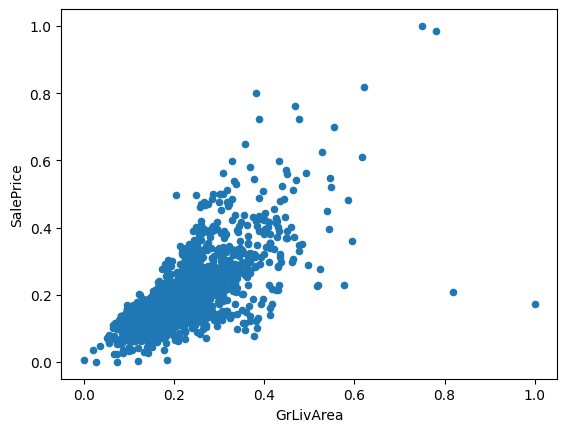

In [1363]:
train_one_hot.plot.scatter(x='GrLivArea', y='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

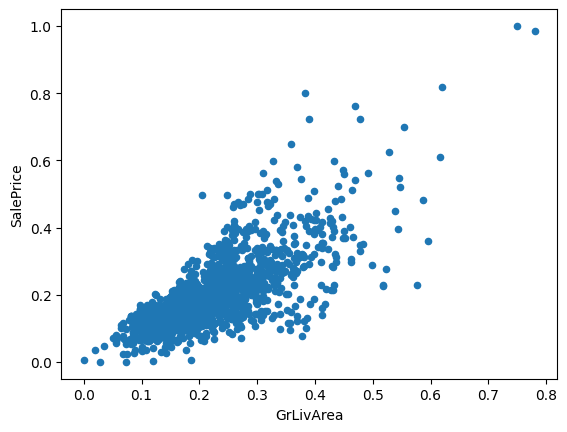

In [1364]:
# delete two outliers that are bottom right
train_one_hot = train_one_hot.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

# plot again to confirm removal
train_one_hot.plot.scatter(x='GrLivArea', y='SalePrice')

## Correcting of Target Variable

reduces accuracy, why?

C:\Users\lsl\AppData\Local\Temp\ipykernel_288\1369122163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_one_hot['SalePrice'] , fit=norm);


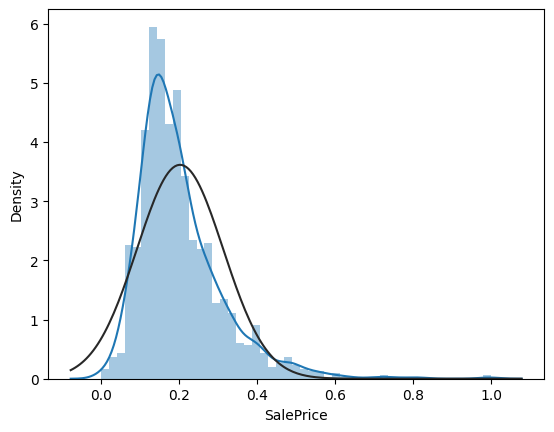

In [1244]:
#sns.distplot(train_one_hot['SalePrice'] , fit=norm);

SalePrice is right-skewed, will be corrected by using the log1p (log(x + 1))

C:\Users\lsl\AppData\Local\Temp\ipykernel_288\4252647909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'] , fit=norm);


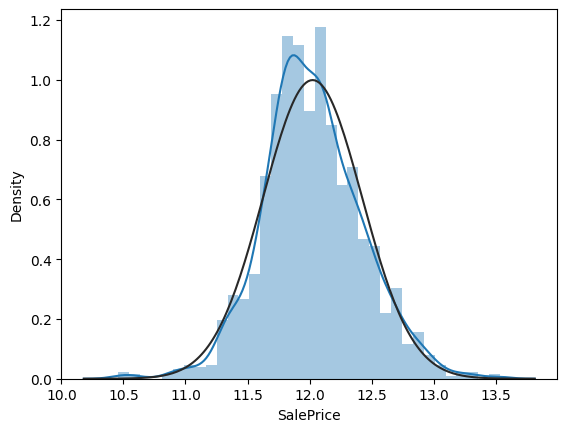

In [1245]:
#train['SalePrice'] = np.log1p(train['SalePrice'])
#sns.distplot(train['SalePrice'] , fit=norm);

## Correlation Map

<Axes: >

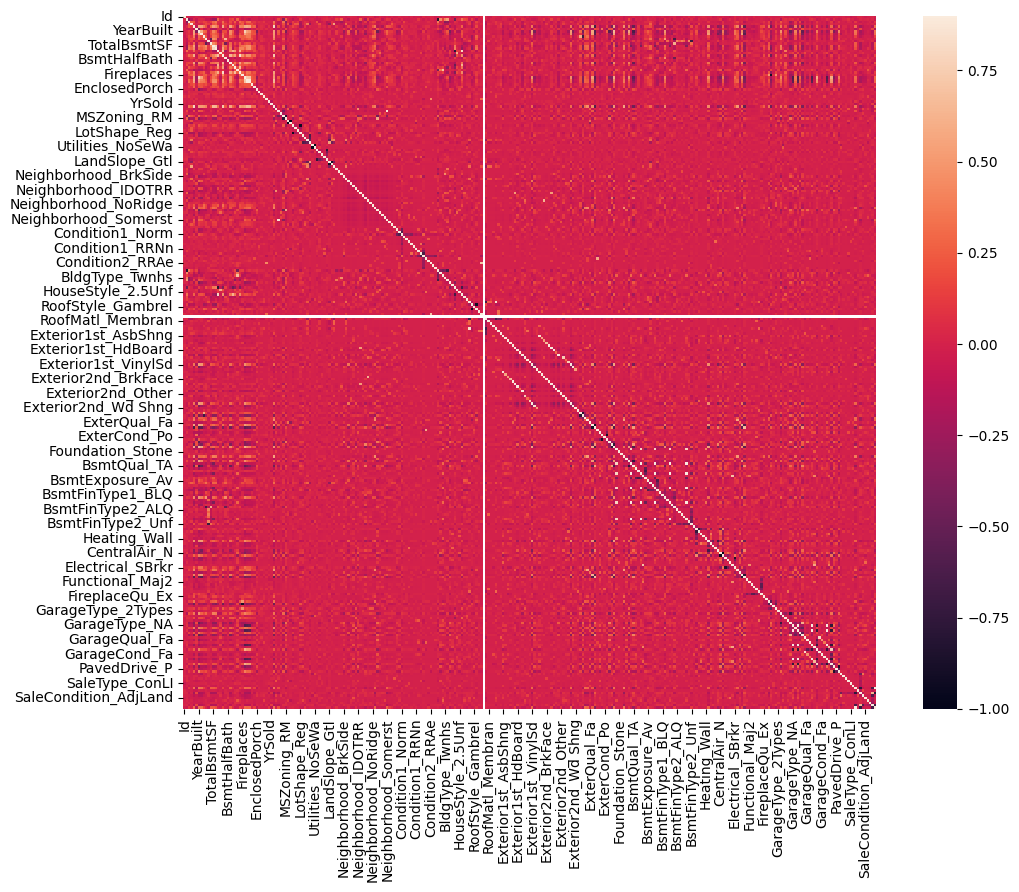

In [1311]:
corrmat = train_one_hot.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [1423]:
exclude_features = ['Id', 'SalePrice']
x_train = train_one_hot[train_one_hot.columns.difference(exclude_features)]
y_train = train_one_hot['SalePrice'].to_numpy().reshape((-1,1))
x_test = test_one_hot[test_one_hot.columns.difference(exclude_features)]

In [1424]:
null_columns = x_train.columns[x_train.isnull().any()]
print("Columns with null values:", null_columns.tolist())

Columns with null values: []


In [1425]:
null_columns = x_test.columns[x_test.isnull().any()]
print("Columns with null values:", null_columns.tolist())

Columns with null values: []


In [1426]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [1427]:
print(f'x_t.shape = {x_train.shape}')
print(f'y_t.shape = {y_train.shape}')
print(f'x_v.shape = {x_val.shape}')
print(f'y_v.shape = {y_val.shape}')

x_t.shape = (1168, 285)
y_t.shape = (1168, 1)
x_v.shape = (292, 285)
y_v.shape = (292, 1)


In [1428]:
lin_r = LinearRegression()
#log_r = LogisticRegression()
lin_r.fit(x_train, y_train)
#log_r.fit(x_train, y_train)

LinearRegression()

In [1429]:
lin_pred = lin_r.predict(x_val).flatten().round().astype('int32')
print(f'lin_pred.shape = {lin_pred.shape}, {lin_pred[0]}')
#log_pred = log_r.predict(x_val)
#print(f'log_pred.shape = {log_pred.shape}, {log_pred[0]}')


lin_pred.shape = (292,), 0


C:\Users\lsl\AppData\Local\Temp\ipykernel_288\1403202811.py:1: RuntimeWarning: invalid value encountered in cast
  lin_pred = lin_r.predict(x_val).flatten().round().astype('int32')


In [1430]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1431]:
x_train.dtypes.value_counts()

bool       249
float64     36
Name: count, dtype: int64

In [1432]:
x_train_np = x_train.astype(np.float32).to_numpy()
x_train_np.dtype

dtype('float32')

In [1433]:
x_test_np = x_test.astype(np.float32).to_numpy()
x_test_np.dtype

dtype('float32')

In [1434]:
print(x_train_np.shape)
print(x_test_np.shape)

(1168, 285)
(1459, 285)


## Model Approach 1

In [1435]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_np.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_squared_error')

In [1436]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 64)                18304     
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 dense_71 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20417 (79.75 KB)
Trainable params: 20417 (79.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

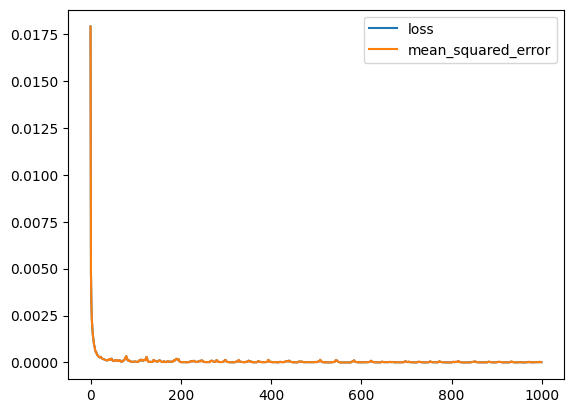

In [1437]:
history = model.fit(x_train_np, y_train, epochs=1000, verbose=0)
pd.DataFrame(history.history).plot()

## Model Approach 2

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 285)               81510     
                                                                 
 dense_52 (Dense)            (None, 142)               40612     
                                                                 
 dense_53 (Dense)            (None, 1)                 143       
                                                                 


Total params: 122265 (477.60 KB)
Trainable params: 122265 (477.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

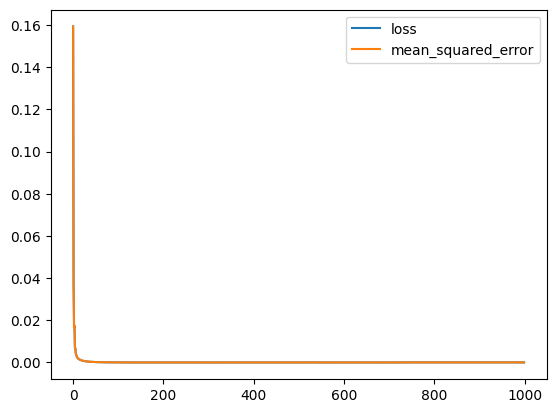

In [ ]:
model = Sequential([
    Dense(x_train_np.shape[1], activation='relu', input_shape=(x_train_np.shape[1],)),
    Dense((x_train_np.shape[1]//2), activation='relu'),
    Dense(1)  # Output layer for regression
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_squared_error')#, 'root_mean_squared_error', 'mean_absolute_error'])
model.summary()
history = model.fit(x_train_np, y_train, epochs=1000, verbose=0, batch_size=256)
pd.DataFrame(history.history).plot()

## Predictions

In [1438]:
# Make predictions
#nn_pred = model.predict(x_test_np).flatten().round().astype('int32')
nn_pred = model.predict(x_test_np).flatten()
print(f'nn_pred.shape = {nn_pred.shape}, {nn_pred[0]}')


46/46 [==============================] - 0s 1ms/step
nn_pred.shape = (1459,), 0.1363595873117447


In [1439]:
nn_pred[:5]

array([0.13635959, 0.16837099, 0.2001015 , 0.22814614, 0.23936465],
      dtype=float32)

In [1440]:
print(len(test.Id.values))
print(len(nn_pred))

1459
1459


🤦‍♂️ ofc we need to scale the values back up...

In [1441]:
saleprice_scaler = scalers_d['SalePrice']
nn_pred_rescaled = saleprice_scaler.inverse_transform(nn_pred.reshape(-1, 1)).flatten()

In [1442]:
nn_pred_rescaled[:5]

array([133092.53, 156143.95, 178993.1 , 199188.03, 207266.48],
      dtype=float32)

In [1443]:
output = pd.DataFrame({'Id': test.Id.values, 'SalePrice': nn_pred_rescaled})
output.to_csv('submission.csv', index=False)

In [1444]:
submission = pd.read_csv('submission.csv')
submission.head(5)

,Id,SalePrice
0,1461,133092.53
1,1462,156143.95
2,1463,178993.10
3,1464,199188.03
4,1465,207266.48


## Kaggle RMSE
### Model Approach 1:
.16404
### Model Approach 2:
.23675

In [ ]:
idx = 50
print(f'lin_pred.shape = {lin_pred.shape}, {lin_pred[idx]}')
print(f'log_pred.shape = {log_pred.shape}, {log_pred[idx]}')
print(f'nn_pred.shape = {nn_pred.shape}, {nn_pred[idx]}')


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_val = y_val.flatten()
y_val.shape

In [ ]:
lin_mean_squared_error = mean_squared_error(lin_pred, y_val)
log_mean_squared_error = mean_squared_error(log_pred, y_val)
nn_mean_squared_error = mean_squared_error(nn_pred, y_val)

In [ ]:
print(f'lin_mean_squared_error = {lin_mean_squared_error}')
print(f'log_mean_squared_error = {log_mean_squared_error}')
print(f'nn_mean_squared_error =  {nn_mean_squared_error}')

In [ ]:
df_lin = pd.DataFrame({'pred': lin_pred, 'true': y_val})
df_log = pd.DataFrame({'pred': log_pred, 'true': y_val})
df_nn = pd.DataFrame({'pred': nn_pred, 'true': y_val})

In [ ]:
df_lin.plot.scatter(x='pred', y='true')

In [ ]:
df_log.plot.scatter(x='pred', y='true')

In [ ]:
df_nn.plot.scatter(x='pred', y='true')